<a href="https://colab.research.google.com/github/kocakcan/ml_foundations/blob/main/kmeans_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

In [2]:
# As in clustering we don't have labels, it is left blank (_)
X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

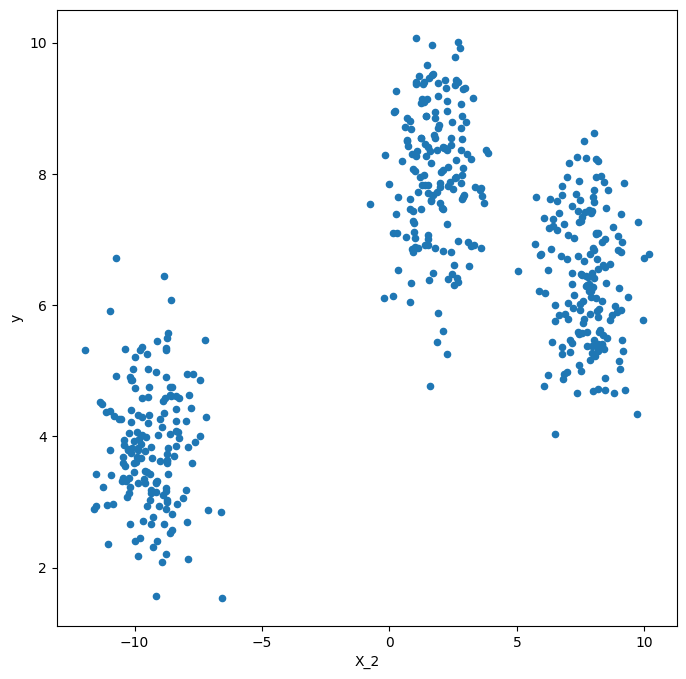

In [3]:
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind="scatter", x='x', y='y')
plt.xlabel("X_1")
plt.xlabel("X_2")
plt.show()

In [4]:
def init_centroids(k, X):
  arr = []
  for i in range(k):
    cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
    cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
    arr.append([cx1, cx2])
  return np.asarray(arr)

In [5]:
def dist(a, b):
  return np.sqrt(sum(np.square(a - b)))

In [6]:
def assign_cluster(k, X, cg):
  cluster = [-1] * len(X)
  for i in range(len(X)):
    dist_arr = []
    for j in range(k):
      dist_arr.append(dist(X[i], cg[j]))
    idx = np.argmin(dist_arr)
    cluster[i] = idx
  return np.asarray(cluster)

In [7]:
def compute_centroids(k, X, cluster):
  cg_arr = []
  for i in range(k):
    arr = []
    for j in range(len(X)):
      if cluster[j] == i:
        arr.append(X[j])
    cg_arr.append(np.mean(arr, axis=0))
  return np.asarray(cg_arr)

In [8]:
def measure_change(cg_prev, cg_new):
  res = 0
  for a, b in zip(cg_prev, cg_new):
    res += dist(a, b)
  return res

In [9]:
def show_clusters(X, cluster, cg):
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
  colors = {0: "blue", 1: "orange", 2: "green"}
  fig, ax = plt.subplots(figsize=(8, 8))
  grouped = df.groupby("label")
  for key, group in grouped:
    group.plot(ax=ax, kind="scatter", x='x', y='y', label=key, color=colors[key])
  ax.scatter(cg[:,0], cg[:,1], marker='x', s=150, c="#ff2222")
  plt.xlabel("X_1")
  plt.xlabel("X_2")
  plt.show()

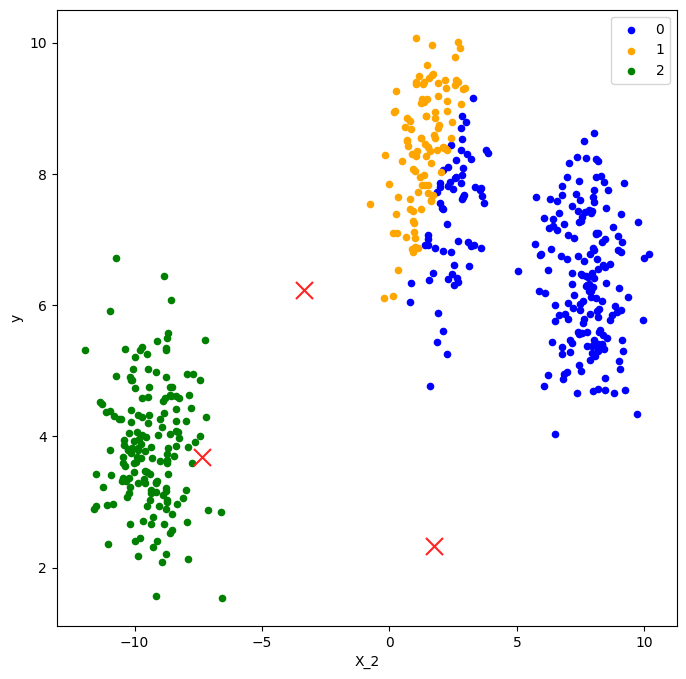

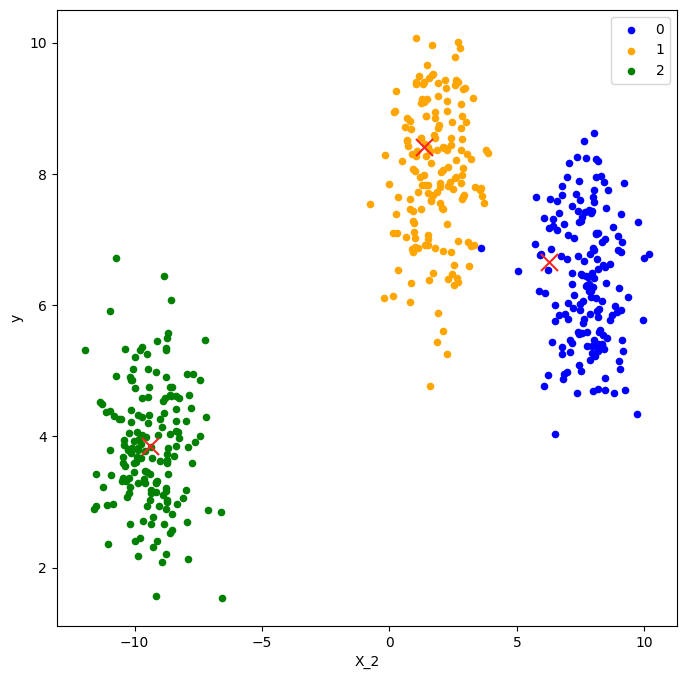

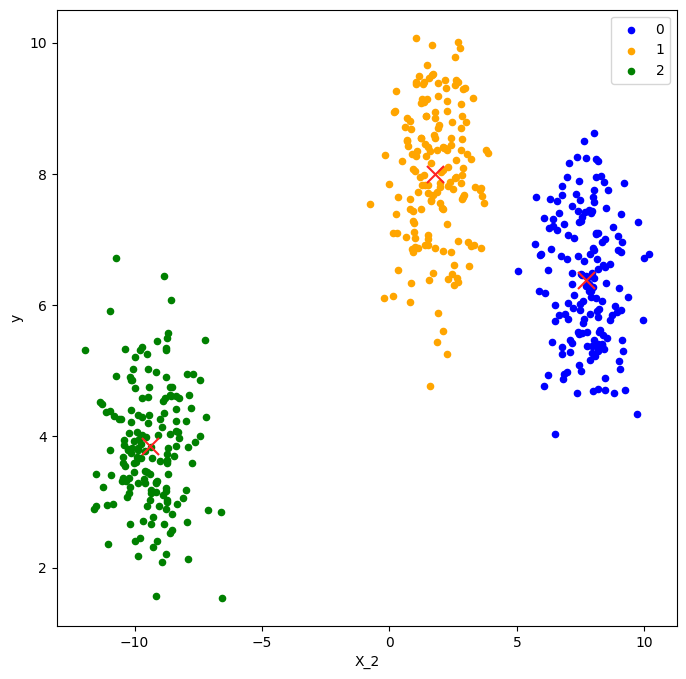

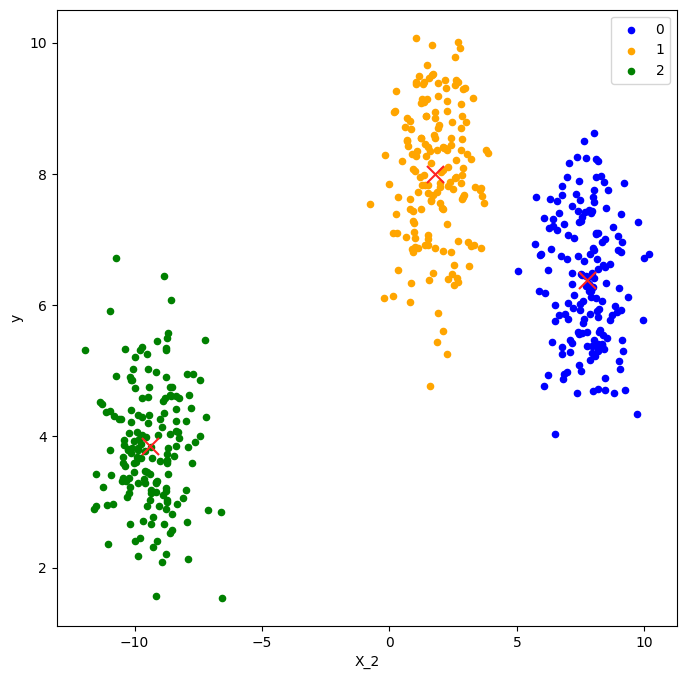

In [10]:
def k_means(k, X):
  cg_prev = init_centroids(k, X)
  cluster = [0] * len(X)
  cg_change = 100
  while cg_change > .001:
    cluster = assign_cluster(k, X, cg_prev)
    show_clusters(X, cluster, cg_prev)
    cg_new = compute_centroids(k, X, cluster)
    cg_change = measure_change(cg_prev, cg_new)
    cg_prev = cg_new
  return cluster

cluster = k_means(3, X_train)